In [9]:
# Imports
import sys
sys.path.append("../")
from src import get_worst_instance
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Constants
Ts = [1, 2, 5]
mu = 0.25
L = 1
GAMMAS = np.linspace(0, 2, 100)
                
# Pre-Compute all rates
variances = [[get_worst_instance(gamma, T, mu, L, objective="variance") for gamma in tqdm(GAMMAS)] for T in Ts]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

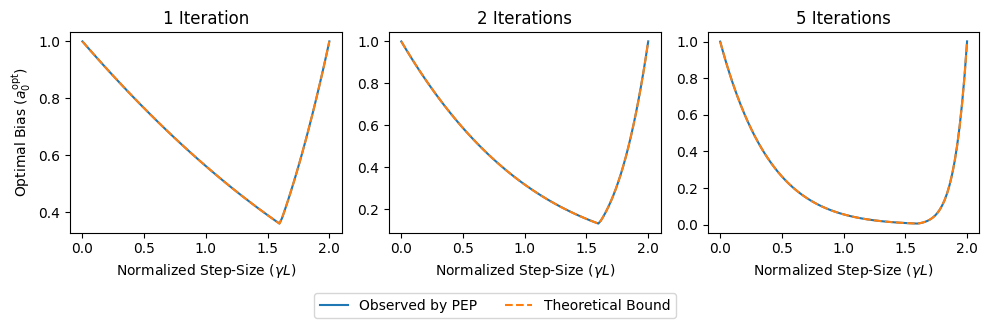

In [14]:
# Plot result with theoretical overlay for rates
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Theoretical rate
rate_theory = lambda gamma, T: max((1 - gamma * mu) ** 2, (gamma - 1) ** 2) ** T

for i, (T, ax) in enumerate(zip(Ts, axs.flatten())):
    # Plot empirical results
    ax.plot(GAMMAS, [r.param.bias.value if r else None for r in variances[i]], label="Observed by PEP")
    
    # Plot theoretical bound
    ax.plot(GAMMAS, [rate_theory(gamma, T) for gamma in GAMMAS], "--", label="Theoretical Bound")
    
    # Axis metadata
    ax.set_title(f"{T} Iteration{"s" if T > 1 else ""}")
    ax.set_xlabel(r"Normalized Step-Size ($\gamma L$)")
    if i == 0: ax.set_ylabel(r"Optimal Bias ($a_0^\text{opt}$)")
    
# Get and show legend
handles, labels = axs.flatten()[0].get_legend_handles_labels()
plt.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))
plt.show()

/var/folders/_m/ybhbkgw97lx48djbw4jxvclh0000gn/T/ipykernel_80535/1642616910.py:6: RuntimeWarning: invalid value encountered in scalar divide
  variance_theory = lambda gamma, T: (1 - phi(gamma) ** (2 * T)) / (1 - phi(gamma) ** 2) * 2 * gamma ** 2 * phi(


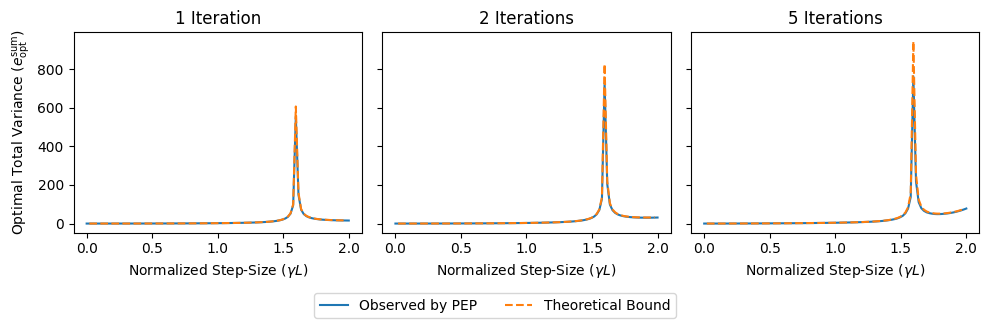

In [13]:
# Plot result with theoretical overlay for rates
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

# Theoretical variance
phi = lambda gamma: 1 - gamma * mu if gamma * (L + mu) <= 2 else gamma * L - 1
variance_theory = lambda gamma, T: (1 - phi(gamma) ** (2 * T)) / (1 - phi(gamma) ** 2) * 2 * gamma ** 2 * phi(
                gamma) / (2 * phi(gamma) - (L - mu) * gamma)
for i, (T, ax) in enumerate(zip(Ts, axs.flatten())):
    # Plot empirical results
    ax.plot(GAMMAS, [r.param.variance.value if r else None for r in variances[i]], label="Observed by PEP")
    
    # Plot theoretical bound
    ax.plot(GAMMAS, [variance_theory(gamma, T) for gamma in GAMMAS], "--", label="Theoretical Bound")
    
    # Axis metadata
    ax.set_title(f"{T} Iteration{"s" if T > 1 else ""}")
    ax.set_xlabel(r"Normalized Step-Size ($\gamma L$)")
    if i == 0: ax.set_ylabel(r"Optimal Total Variance ($e_\text{opt}^\text{sum}$)")
    
# Get and show legend
handles, labels = axs.flatten()[0].get_legend_handles_labels()
plt.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))
plt.show()